In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1588476374938_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sb

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df = spark.read.json('s3://sayerspyspark/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
print(f'Columns: {len(df.columns)} | Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209,393

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [6]:
df.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

In [7]:
from pyspark.sql.functions import *

x1 = df.select(col("business_id"), explode(split(col("categories"), ",")).alias('categories'))
x1=x1.withColumn('categories', ltrim(x1.categories))
x1.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

In [8]:
x1.select('categories').groupby(x1.categories).count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

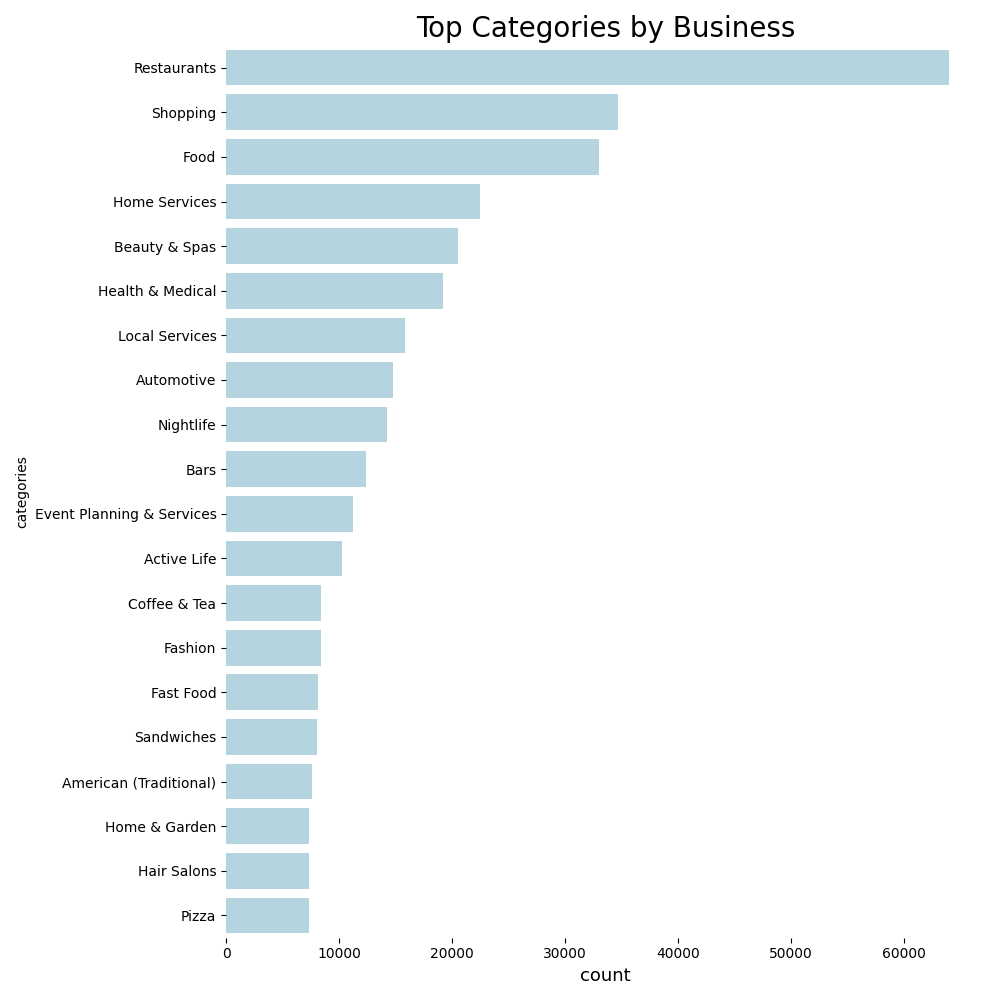

In [9]:
zx = x1.select('categories').groupby(x1.categories).count().sort(desc("count")).limit(20).toPandas()

plt.clf()
plt.figure(figsize=(10,10))
plt.title('Top Categories by Business', fontsize=20)
#plt.yticks(fontsize=12)
#plt.xticks(fontsize=12)
plt.xlabel('',fontsize=13)
plt.xlabel('category',fontsize=13)
plt.box(False)
plt.gca().invert_yaxis()
sb.barplot(zx['count'],zx['categories'],color="lightblue")
plt.tight_layout()
%matplot plt

In [10]:
udf = spark.read.json('s3://sayerspyspark/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
udf.printSchema()
#print(f'Columns: {len(udf.columns)} | Rows: {udf.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [12]:
udf.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [14]:
from pyspark.sql.functions import col, avg
udx = udf.where(col("text").isNotNull()).groupby(udf.business_id).agg(avg(col("stars")))
udx.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [15]:
from pyspark.sql.functions import desc

udy = udf.groupby(udf.business_id).agg(avg(col("stars")))
new_df = df.join(udx, on=['business_id'])
new_df2= df.join(udy,on=['business_id'])
#new_df = new_df.select("avg(stars)","stars","name","city","state").sort(desc("""avg(stars)"""))
#new_df2 = new_df2.select("avg(stars)","stars","name","city","state").sort(desc("""avg(stars)"""))
new_df.select("""avg(stars)""","stars","name","city","state").sort(desc("""avg(stars)""")).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------+-----+
|avg(stars)|stars|                name|     city|state|
+----------+-----+--------------------+---------+-----+
|       5.0|  5.0|                NEON|  Phoenix|   AZ|
|       5.0|  5.0|Platinum Real Estate|Henderson|   NV|
|       5.0|  5.0|Lola Karacsonyi -...|Las Vegas|   NV|
|       5.0|  5.0|         ITM Trading|  Phoenix|   AZ|
|       5.0|  5.0|          Indie Love|  Toronto|   ON|
+----------+-----+--------------------+---------+-----+
only showing top 5 rows

In [16]:
x = new_df.select("avg(stars)","stars","name","city","state").sort("""avg(stars)""",ascending=False)
y =   new_df2.select("avg(stars)","stars","name","city","state").sort("""avg(stars)""",ascending=False)
new_dfx = x.withColumn("skew", ((x["""avg(stars)"""]-y["stars"])/x["stars"])).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

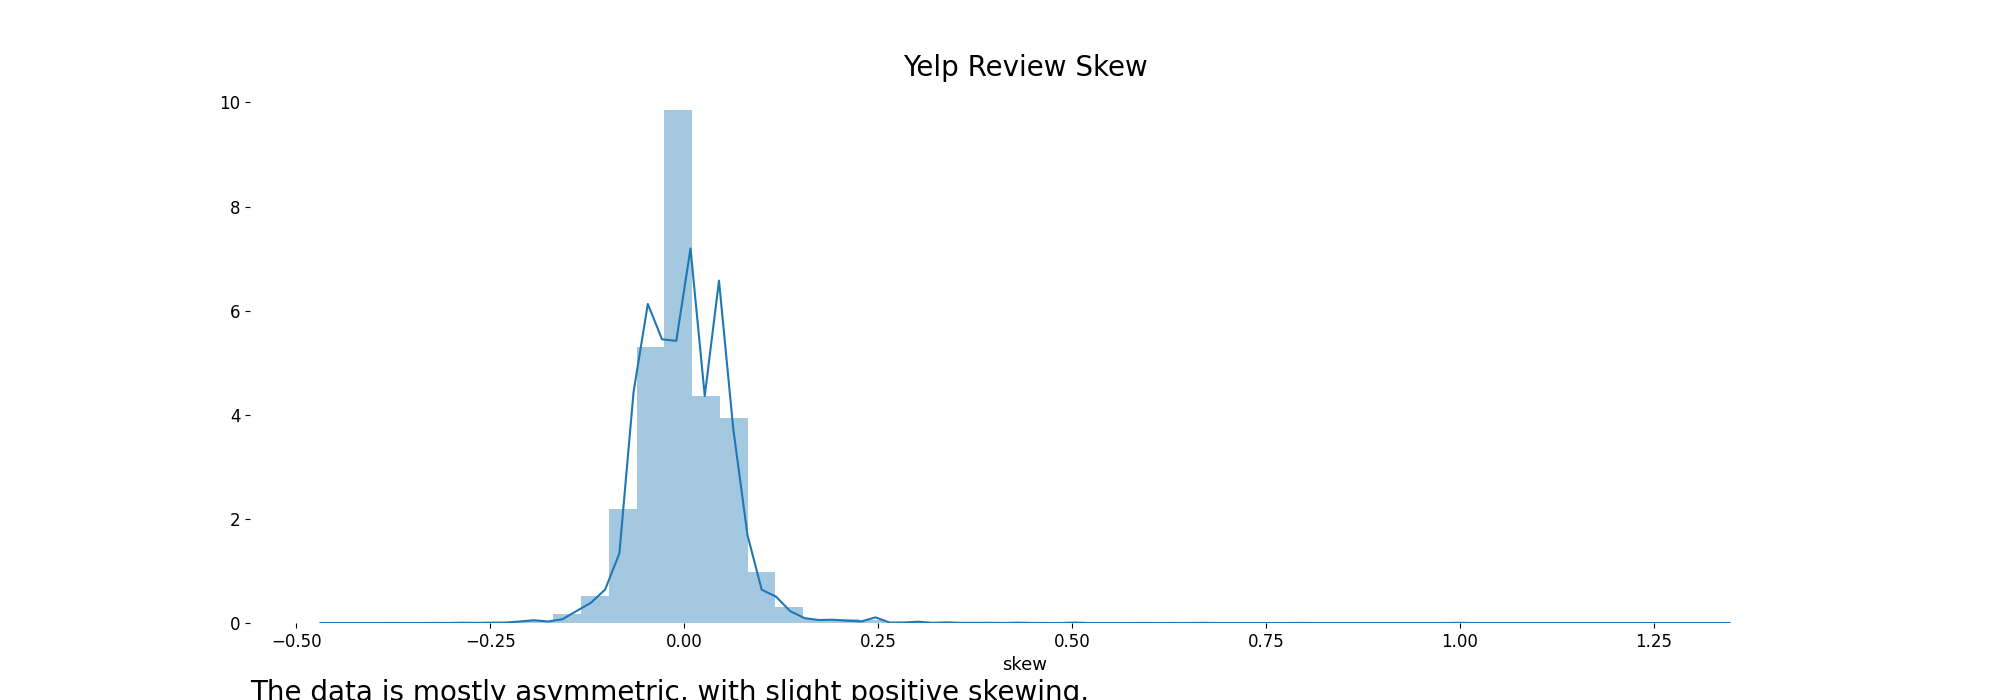

In [17]:
plt.clf()
plt.figure(figsize=(20,7))
plt.title('Yelp Review Skew', fontsize=20)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('',fontsize=13)
plt.box(False)
hist_kws=dict(alpha=0.2)
sb.distplot(new_dfx["skew"])
plt.annotate("The data is mostly asymmetric, with slight positive skewing.",(0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top',fontsize=20)
%matplot plt

In [18]:
print("Asymmetric data with slightly positive skewing means there is an insignificant positive skew, suggesting that a small number of people rate positively without ever leaving a review.")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Asymmetric data with slightly positive skewing means there is an insignificant positive skew, suggesting that a small number of people rate positively without ever leaving a review.

In [19]:
users = spark.read.json('s3://sayerspyspark/yelp_academic_dataset_user.json')
reviews= spark.read.json('s3://sayerspyspark/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
userselite = users.select(col("user_id"), explode(split(col("elite"), ",")).alias('elite_yrs'))
userselitecnt = userselite.groupby(userselite.user_id).agg(count(col("elite_yrs")).alias("yrs_elite"))
userselitecnt = userselitecnt.withColumn("yrs_elite", userselitecnt['yrs_elite']-1)
avgreview  = reviews.groupby(col("user_id")).agg(avg("stars").alias("avg_stars"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
revcount = reviews.groupby("user_id","stars").agg(count("stars").alias("rev_count"))
revmax = revcount.groupby("user_id").agg(max("rev_count").alias("rev_count"))
revmode = revmax.join(revcount, on=["user_id","rev_count"])
#mode = revcount.join(
#    revcount.agg(max("rev_count").alias("max_")), col("rev_count") == col("max_")
#).select("user_id","stars")
revmode = revmode.withColumnRenamed("stars","stars2")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
elitetrust = userselitecnt.join(avgreview, on="user_id").toPandas()
elitemode = userselitecnt.join(revmode, on="user_id").groupby('yrs_elite','stars2').agg(count("stars2")).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

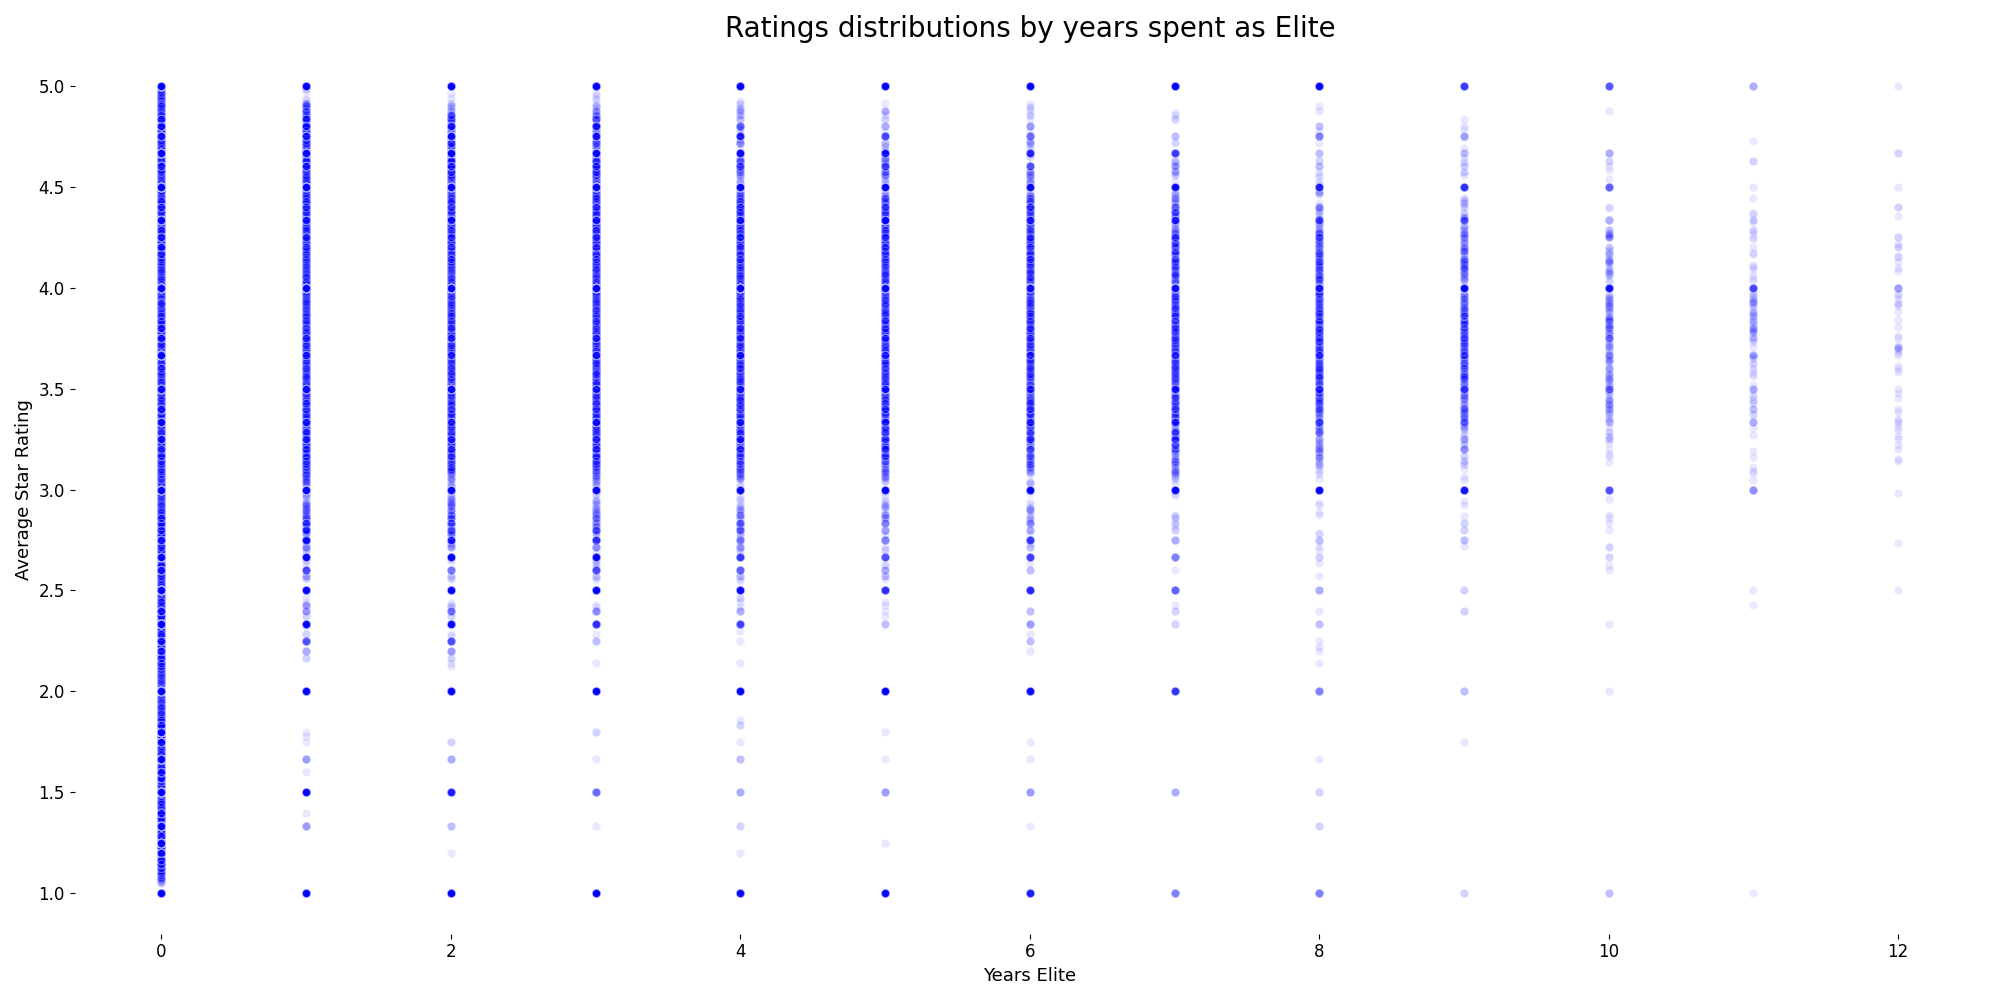

In [24]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title('Ratings distributions by years spent as Elite', fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.box(False)
#sb.scatterplot(elitemode['yrs_elite'],elitemode['stars2'],color="red")
sb.scatterplot(elitetrust['yrs_elite'],elitetrust['avg_stars'],alpha=0.09, color="blue")
plt.xlabel("Years Elite",fontsize=13)
plt.ylabel("Average Star Rating", fontsize = 13)
plt.tight_layout()
%matplot plt



In [27]:
print("The higher the number of years a given user has spent as an Elite, the higher their average rating is. This suggests not only that Elites are more likely to give good reviews but also may indicate that people that give good reviews may be more likely to be chosen as Elites. Comparatively, the distribution of the average scores of users who ahve never been Elite runs the full gamut.")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The higher the number of years a given user has spent as an Elite, the higher their average rating is. This suggests not only that Elites are more likely to give good reviews but also may indicate that people that give good reviews may be more likely to be chosen as Elites. Comparatively, the distribution of the average scores of users who ahve never been Elite runs the full gamut.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

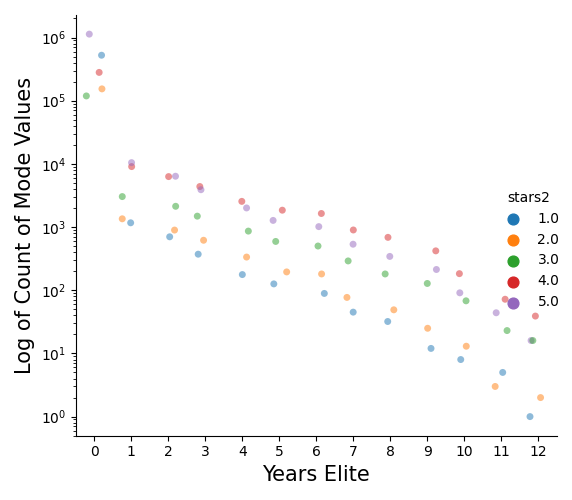

In [30]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title('Probability of a given score being the mode per year spent as an Elite', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)



plt.box(False)
#sb.barplot(elitemode,color="red")
g = sb.catplot(x = 'yrs_elite',y="""count(stars2)""",data=elitemode,kind="strip",alpha=0.5, hue="stars2",jitter=0.25)
plt.yscale('log')
#plt.hist(elitemode)
plt.ylabel("Log of Count of Mode Values",fontsize=15)
plt.xlabel("Years Elite",fontsize=15)
#legend = g.legend
#legend.set_title("Sex")
#legend = plt.legend(handles=[1, 2, 3,4,5], title="title",loc=4, fontsize='small', fancybox=True)
plt.tight_layout()
%matplot plt

In [31]:
print("The frequency distribution of the mode of a given Elite's ratings has a much larger and more distinct spread than non-elites, with higher ratings being the norm more often, the more years someone has been an Elite. This suggests potentially that this behavior is incentivized or else its converse is punished, possibly through revocation of that status.")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The frequency distribution of the mode of a given Elite's ratings has a much larger and more distinct spread than non-elites, with higher ratings being the norm more often, the more years someone has been an Elite. This suggests potentially that this behavior is incentivized or else its converse is punished, possibly through revocation of that status.